In [14]:
import pandas as pd
import os
import json
import numpy as np
import matplotlib.pyplot as plt

folder_path = './logs/'

data_dict = {}

for file_name in os.listdir(folder_path):
    
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        
        with open(file_path, 'r') as file:
            data = json.load(file)
            
            model_name = data['model_name_or_path']
            data_path = data['data_path']
            result = round(data['neg_log_prob_sum'], 2) / data['avg character count']
            
            if model_name not in data_dict:
                data_dict[model_name] = {}
            
            data_dict[model_name][data_path] = result

df_result = pd.DataFrame(data_dict).T

df_result['Average Score'] = df_result.mean(axis=1)

df_result_sorted = df_result.sort_values(by='Average Score')

df_result_sorted


,arxiv_pdfs_cs_240322to240328.json,arxiv_pdfs_phy_240322to240328.json,bbc_news_240322to240329.json,Average Score
./models/temp/RWKV-x060-World-1B6-v2.1-20240328-ctx4096.pth,0.603942,0.637920,0.524892,0.588918
./models/temp/RWKV-x060-World-1B6-v2-20240208-ctx4096.pth,0.605132,0.637340,0.527946,0.590139
./models/temp/RWKV-5-World-1B5-v2-20231025-ctx4096.pth,0.611040,0.644372,0.532028,0.595813
stabilityai/stablelm-2-1_6b,0.622582,0.663964,0.501860,0.596135
h2oai/h2o-danube-1.8b-base,0.659988,0.717676,0.501481,0.626382
TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T,0.674362,0.718302,0.532009,0.641558
./models/temp/RWKV-4-World-1.5B-v1-fixed-20230612-ctx4096.pth,0.666816,0.715924,0.545129,0.642623
42dot/42dot_LLM-PLM-1.3B,0.681474,0.706102,0.542532,0.643369
Qwen/Qwen1.5-1.8B,0.678056,0.728026,0.543348,0.649810
./models/temp/RWKV-4-Pile-1B5-20220903-8040.pth,0.685324,0.704430,0.562260,0.650671


In [15]:
from matplotlib.colors import LinearSegmentedColormap

# light_green_to_red_cmap = LinearSegmentedColormap.from_list(
#     'light_green_to_red', 
#     [(0, '#c8e6c9'),  # light green with some white
#      (0.5, '#ffffff'), # white
#      (1, '#ffccbc')]   # light red with some white
# )

light_green_to_red_cmap = LinearSegmentedColormap.from_list(
    'medium_green_to_red', 
    [(0, '#63be7b'),  # medium green
     (0.5, '#ffffff'), # white
     (1, '#f8696b')]   # medium red
)

styled_df_custom = df_result_sorted.style.background_gradient(cmap=light_green_to_red_cmap, axis=0)

styled_df_custom



,arxiv_pdfs_cs_240322to240328.json,arxiv_pdfs_phy_240322to240328.json,bbc_news_240322to240329.json,Average Score
./models/temp/RWKV-x060-World-1B6-v2.1-20240328-ctx4096.pth,0.603942,0.637920,0.524892,0.588918
./models/temp/RWKV-x060-World-1B6-v2-20240208-ctx4096.pth,0.605132,0.637340,0.527946,0.590139
./models/temp/RWKV-5-World-1B5-v2-20231025-ctx4096.pth,0.611040,0.644372,0.532028,0.595813
stabilityai/stablelm-2-1_6b,0.622582,0.663964,0.501860,0.596135
h2oai/h2o-danube-1.8b-base,0.659988,0.717676,0.501481,0.626382
TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T,0.674362,0.718302,0.532009,0.641558
./models/temp/RWKV-4-World-1.5B-v1-fixed-20230612-ctx4096.pth,0.666816,0.715924,0.545129,0.642623
42dot/42dot_LLM-PLM-1.3B,0.681474,0.706102,0.542532,0.643369
Qwen/Qwen1.5-1.8B,0.678056,0.728026,0.543348,0.649810
./models/temp/RWKV-4-Pile-1B5-20220903-8040.pth,0.685324,0.704430,0.562260,0.650671


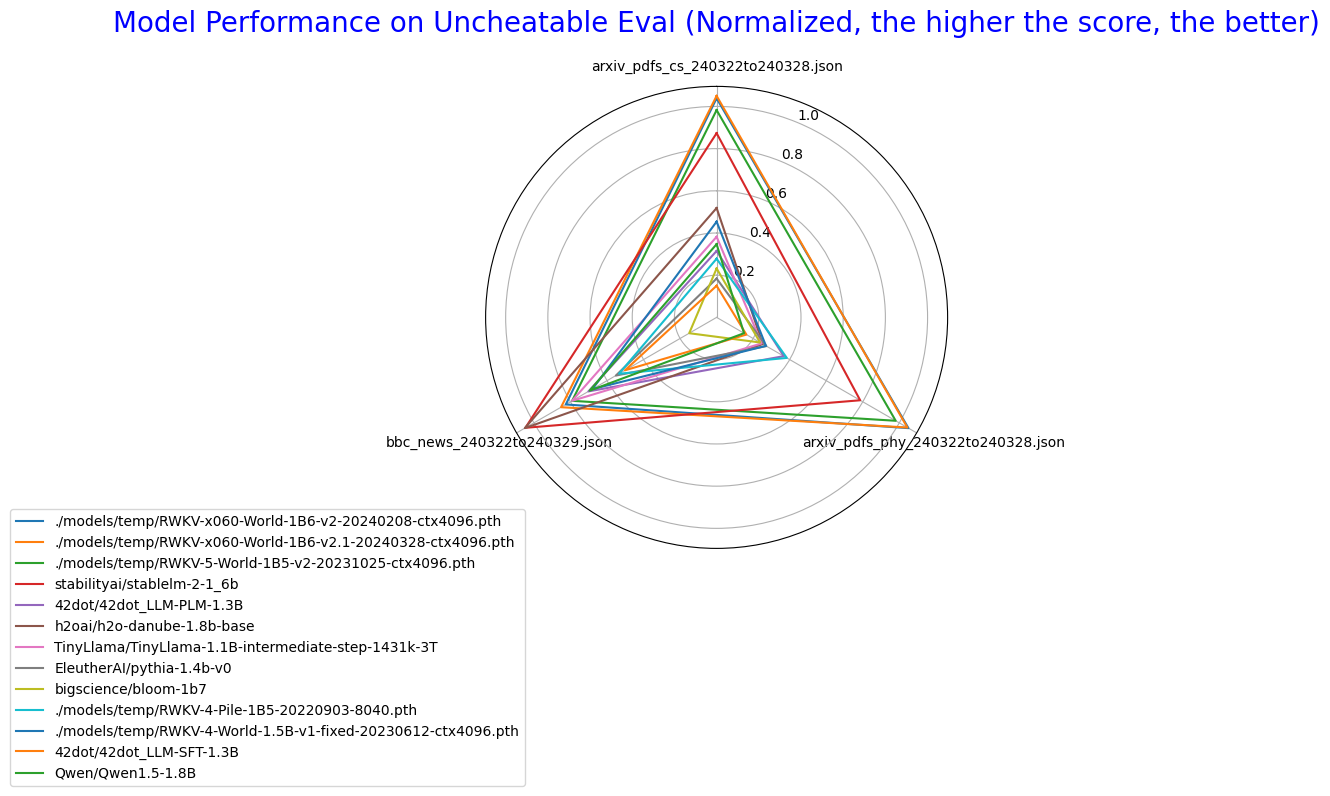

In [16]:
if 'Average Score' in df_result.columns:
    df_result = df_result.drop('Average Score', axis=1)

max_value = df_result.max().max() + 0.05

normalized_df_result = 1 - ((df_result - df_result.min()) / (df_result.max() - df_result.min())) * 0.9 + 0.05

def create_radar_chart(data_frame, title):
    labels = data_frame.columns.values
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    for index, row in data_frame.iterrows():
        values = row.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, label=index)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    plt.title(title, size=20, color='blue', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.show()

create_radar_chart(normalized_df_result, 'Model Performance on Uncheatable Eval (Normalized, the higher the score, the better)')